## 0b

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import re
import os


raw_data_path = Path("../data/cats_and_dogs")
test_path = raw_data_path/"test"/"test"
train_path = raw_data_path/"train"/"train"

In [2]:
train_list = list(train_path.iterdir())


In [3]:
images = np.random.choice(train_list, 10)
pattern = r"\b\w{3}\b"
labels = [re.findall(pattern, path.name)[0] for path in images]

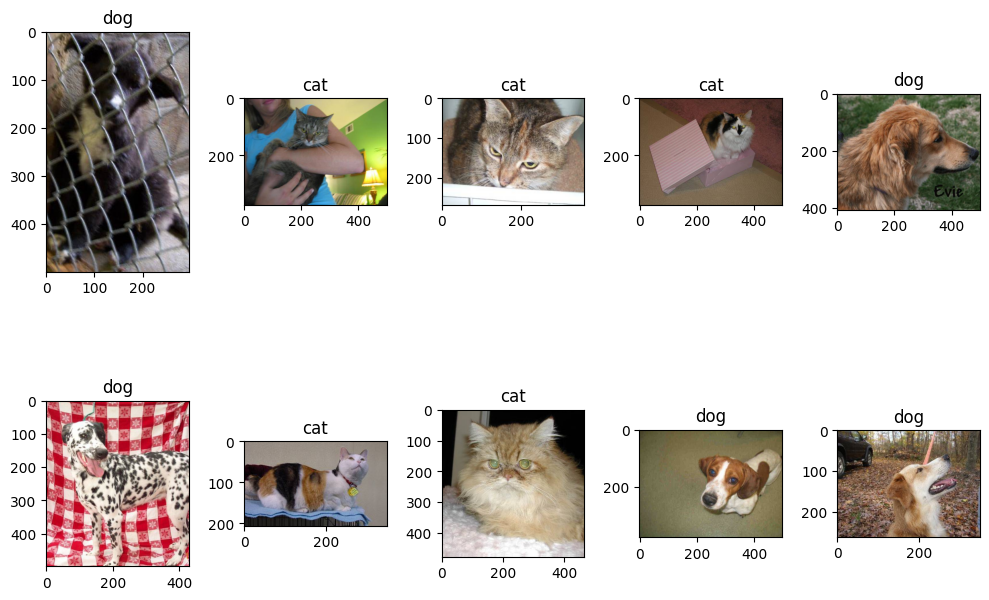

In [4]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))
for i, ax in enumerate(axes.flatten()):
    image= plt.imread(images[i])       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 0c

In [5]:
currentPath = Path("")
currentPath

WindowsPath('.')

In [6]:
#currentPath = Path("../data/cat_dog_filtered")


# Folders for small data
experimental_small_path= currentPath/"experiment_small_data"
experimental_small_path.mkdir(exist_ok=True)

experimental_small_test_path= experimental_small_path/"test"
experimental_small_test_path.mkdir(exist_ok=True)

experimental_small_train_path= experimental_small_path/"train"
experimental_small_train_path.mkdir(exist_ok=True)

experimental_small_val_path= experimental_small_path/"val"
experimental_small_val_path.mkdir(exist_ok=True)

# Folders for tiny data

experimental_tiny_path= currentPath/"experiment_tiny_data"
experimental_tiny_path.mkdir(exist_ok=True)

experimental_tiny_train_path= experimental_tiny_path/"train"
experimental_tiny_train_path.mkdir(exist_ok=True)

experimental_tiny_test_path= experimental_tiny_path/"test"
experimental_tiny_test_path.mkdir(exist_ok=True)

experimental_tiny_val_path= experimental_tiny_path/"val"
experimental_tiny_val_path.mkdir(exist_ok=True)

# Folders for original data

original_path = currentPath/"original_data"
original_path.mkdir(exist_ok=True)

original_test = original_path/"test"/"test"
original_test.mkdir(parents=True, exist_ok=True)

original_train = original_path/"train"/"train"
original_train.mkdir(parents=True, exist_ok=True)

In [7]:
import shutil
import stat
def clear_folder(folder_path):
    folder = Path(folder_path)
    for item in folder.iterdir():
        folder = Path(item)
        for test in folder.iterdir():
            #os.chmod(test, stat.S_IWRITE)

            if test.is_dir():
                shutil.rmtree(test)
            else:
                test.unlink()
                


In [8]:
clear_folder(experimental_small_path)
clear_folder(experimental_tiny_path)

## 0d

In [9]:
import random

def cat_dog(image_list:list, amount:int):
    total_dogs= [dog for dog in image_list if "dog" in dog.name]
    
    total_cats= [cat for cat in image_list if "cat" in cat.name]
    
    random_numbers = random.sample(range(7501), 2500)

    train_amount = int(0.32*amount)
    train = list()
    for i in range(train_amount):
        train.append(total_dogs[random_numbers[i]])
        train.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    val_amount = int(0.08*amount)
    val = list()
    for i in range(val_amount):
        val.append(total_dogs[random_numbers[i]])
        val.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    test_amount = int(0.1*amount)
    test = list()
    for i in range(test_amount):
        test.append(total_dogs[random_numbers[i]])
        test.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    #dog_train_amount = random_numbers[:0.32*amount]
    #cat_train_amount = random_numbers[0.32*amount:0.64*amount]
    
    #dog_val_amount = random_numbers[0.64*amount:0.72*amount]
    #cat_val_amount = random_numbers[0.72*amount*0.80*amount]
    
    #dog_test_amount = random_numbers[0.80*amount:0.90*amount]
    #cat_test_amount = random_numbers[0.90*amount:amount]
    
    random.shuffle(train)
    test = random.sample(test, len(test))
    val = random.sample(val, len(val))
    return train, val, test
    
    

In [10]:
train_data_small, val_data_small, test_data_small = cat_dog(train_list, 2500)
train_data_tiny,val_data_tiny, test_data_tiny = cat_dog(train_list, 250)

In [11]:
import shutil
def image_copier(dest_path, dataset):
    if not os.listdir(dest_path):
        for path in dataset:
                shutil.copy(path, dest_path)
        
    else:
        print("The folder is not empty")


In [12]:
image_copier(experimental_small_test_path, test_data_small)
image_copier(experimental_small_train_path, train_data_small)
image_copier(experimental_small_val_path, val_data_small)

image_copier(experimental_tiny_test_path, test_data_tiny)
image_copier(experimental_tiny_train_path, train_data_tiny)
image_copier(experimental_tiny_val_path, val_data_tiny)

In [13]:
def labeler(data):
    labels = []
    images = []
    for path in data:    # setting labels 1 for dog, 0 for cat
        label = 1 if "dog" in path.name else 0
        labels.append(label)
        
        image = plt.imread(str(path))
        images.append(image)
    return images, np.array(labels)

## 0e

In [14]:
test_list_small = list(experimental_small_test_path.iterdir())
train_list_small = list(experimental_small_train_path.iterdir())
val_list_small = list(experimental_small_val_path.iterdir())

test_list_tiny = list(experimental_tiny_test_path.iterdir())
train_list_tiny = list(experimental_tiny_train_path.iterdir())
val_list_tiny = list(experimental_tiny_val_path.iterdir())

In [15]:
random.shuffle(test_list_small)
random.shuffle(train_list_small)
random.shuffle(val_list_small)
random.shuffle(test_list_tiny)
random.shuffle(train_list_tiny)
random.shuffle(val_list_tiny)
X_test_small, y_test_small = labeler(test_list_small)
X_test_tiny, y_test_tiny = labeler(test_list_tiny)
X_train_small, y_train_small = labeler(train_list_small)
X_train_tiny, y_train_tiny = labeler(train_list_tiny)
X_val_small, y_val_small = labeler(val_list_small)
X_val_tiny, y_val_tiny = labeler(val_list_tiny)

In [16]:
import pandas as pd
import seaborn as sns
def plot(images, labels):
    df = pd.DataFrame({"image": images, "label": labels})
    df["count"] = df["label"].sum()
    sns.barplot(data=df, x="label", y="count", palette=["#0398fc", "orange"])

## Small list

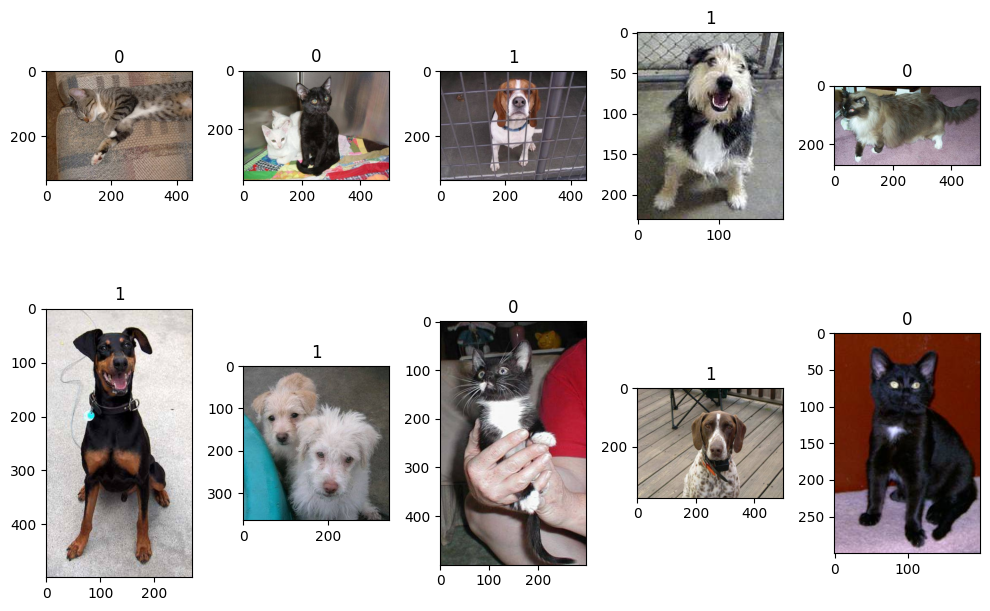

In [17]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_small[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_small[i])
    
fig.tight_layout()  

C:\Users\hampu\AppData\Local\Temp\ipykernel_18324\3526214338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="label", y="count", palette=["#0398fc", "orange"])


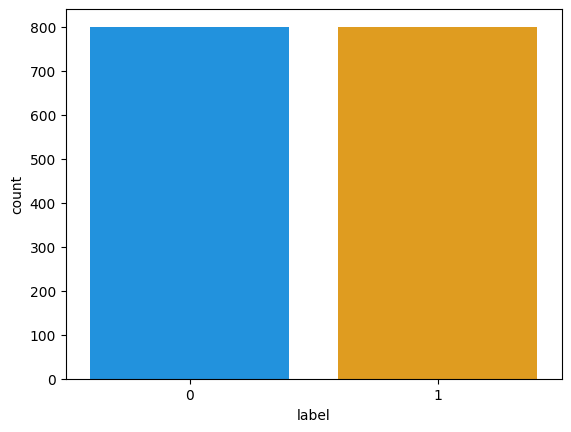

In [18]:
plot(X_train_small, y_train_small)

## Tiny list

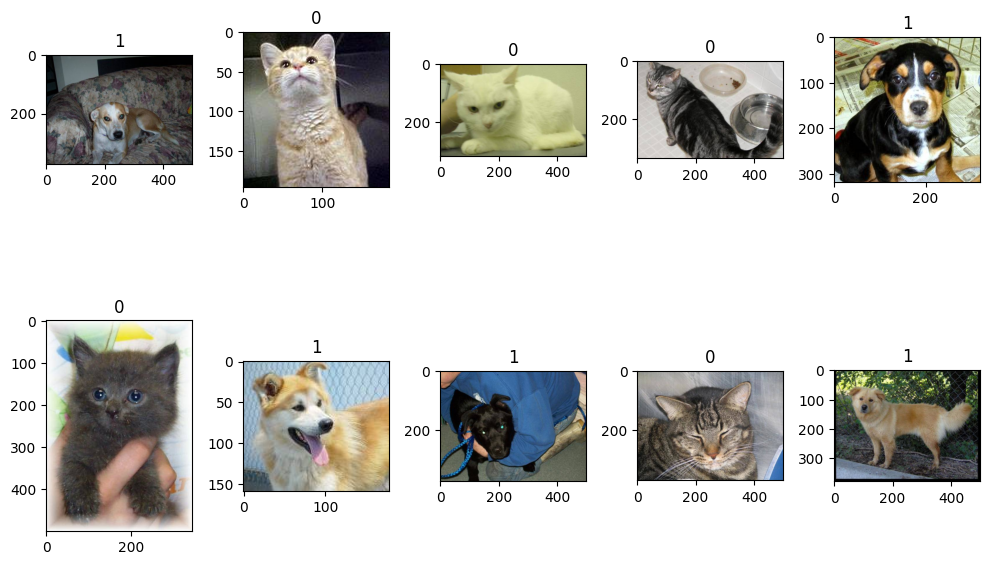

In [19]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_tiny[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_tiny[i])
    
fig.tight_layout()  

C:\Users\hampu\AppData\Local\Temp\ipykernel_18324\3526214338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="label", y="count", palette=["#0398fc", "orange"])


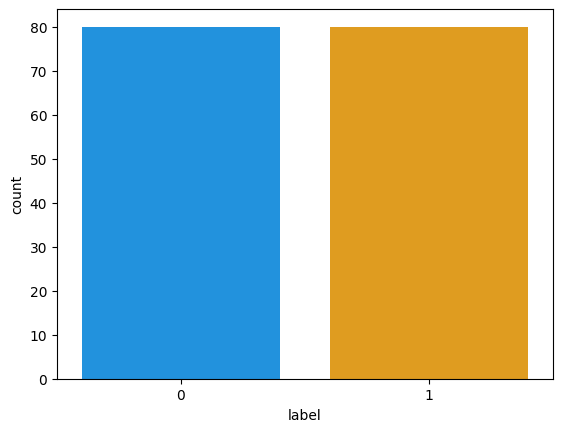

In [20]:
plot(X_train_tiny, y_train_tiny)

In [21]:
# Create a list with index for each dataset
import plotly.graph_objects as go
train_index = list(range(len(y_train_small)))

fig = go.Figure()

# Dataset
fig.add_trace(go.Scatter(x=train_index, y=y_train_small, mode='markers', name='Train'))


fig.update_layout(title='Dataset with index',
                  xaxis_title='Index',
                  yaxis_title='Label',
                  yaxis=dict(
                      tickvals=[0, 1],
                      ticktext=['Cat', 'Dog']
                  ))

fig.show()

## 1a

In [22]:
def image_size(data):
    image_sizes = []
    
    for image in data:
        image_size = image.shape[:2]
        image_sizes.append(image_size)
    return image_sizes

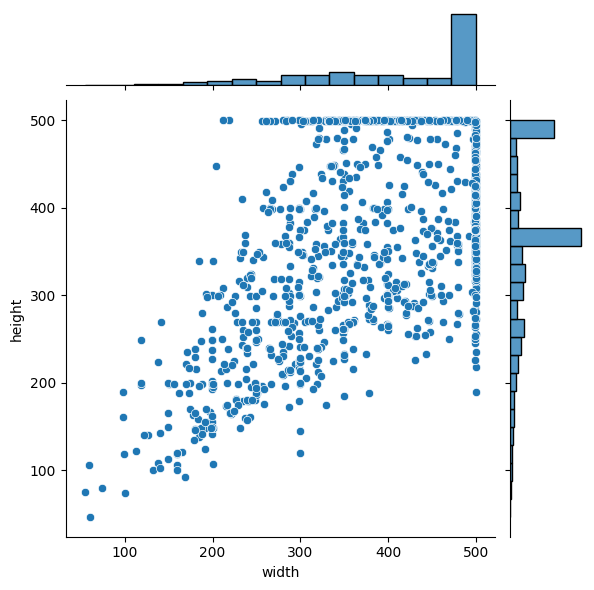

In [23]:
train_sizes_small = image_size(X_train_small)

df_train_sizes_small= pd.DataFrame( data= train_sizes_small, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_small, x = "width", y = "height")

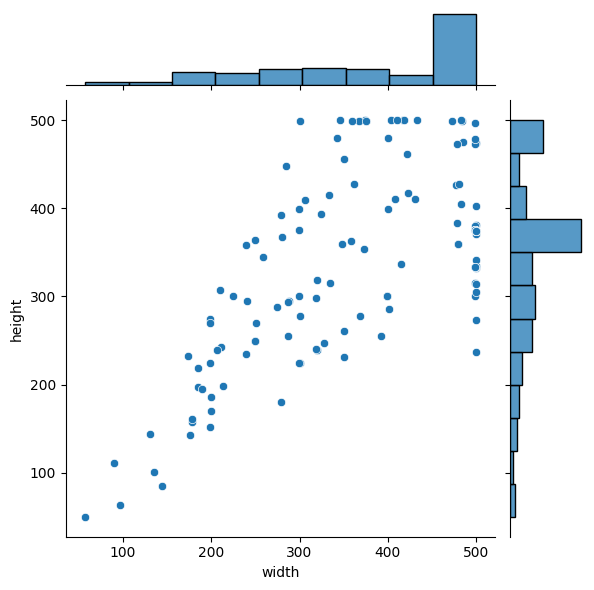

In [24]:
train_sizes_tiny = image_size(X_train_tiny)
df_train_sizes_tiny= pd.DataFrame( data= train_sizes_tiny, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_tiny, x = "width", y = "height")

## 1b

Removed smaller images to get rid of the most blurry ones

In [25]:
train_sizes_small
filtered_train_sizes_small = [size for size in train_sizes_small if size[0] >= 100 and size[1] >= 100]
print(filtered_train_sizes_small)

[(335, 448), (375, 499), (335, 448), (230, 180), (273, 500), (499, 271), (364, 345), (500, 300), (374, 500), (300, 199), (499, 312), (444, 471), (374, 500), (291, 430), (374, 500), (397, 499), (359, 480), (374, 500), (329, 499), (490, 499), (463, 500), (406, 500), (374, 500), (499, 375), (243, 234), (276, 300), (309, 500), (415, 500), (374, 500), (374, 500), (499, 375), (499, 362), (500, 374), (499, 256), (268, 293), (308, 409), (363, 499), (375, 499), (500, 380), (326, 437), (374, 500), (500, 406), (500, 430), (299, 400), (450, 457), (375, 499), (374, 500), (260, 400), (371, 499), (499, 355), (500, 390), (374, 500), (373, 500), (375, 499), (375, 499), (500, 298), (375, 499), (245, 499), (299, 450), (374, 500), (287, 432), (359, 278), (377, 499), (374, 500), (271, 383), (278, 420), (336, 450), (441, 439), (374, 500), (499, 468), (359, 318), (482, 499), (338, 499), (257, 299), (308, 212), (499, 423), (375, 499), (375, 499), (336, 364), (466, 391), (374, 500), (240, 319), (375, 499), (33

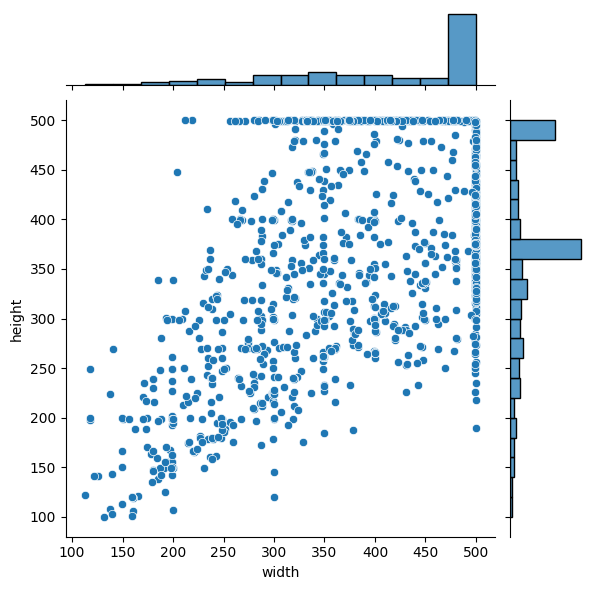

In [26]:

df_train_sizes_small= pd.DataFrame( data= filtered_train_sizes_small, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_small, x = "width", y = "height")

In [30]:
import cv2

def prep_images(data, size = (200, 200)):
    prepped_images = []
    
    for image in data:
        resized_image = cv2.resize(image, size)
        prepped_images.append(resized_image)
    return np.array(prepped_images)

In [31]:
X_train_small = prep_images(X_train_small)
X_train_tiny = prep_images(X_train_tiny)
X_test_small = prep_images(X_test_small)
X_test_tiny = prep_images(X_test_tiny)
X_val_small = prep_images(X_val_small)
X_val_tiny = prep_images(X_val_tiny)



In [32]:
X_train_small.shape

(1600, 200, 200, 3)

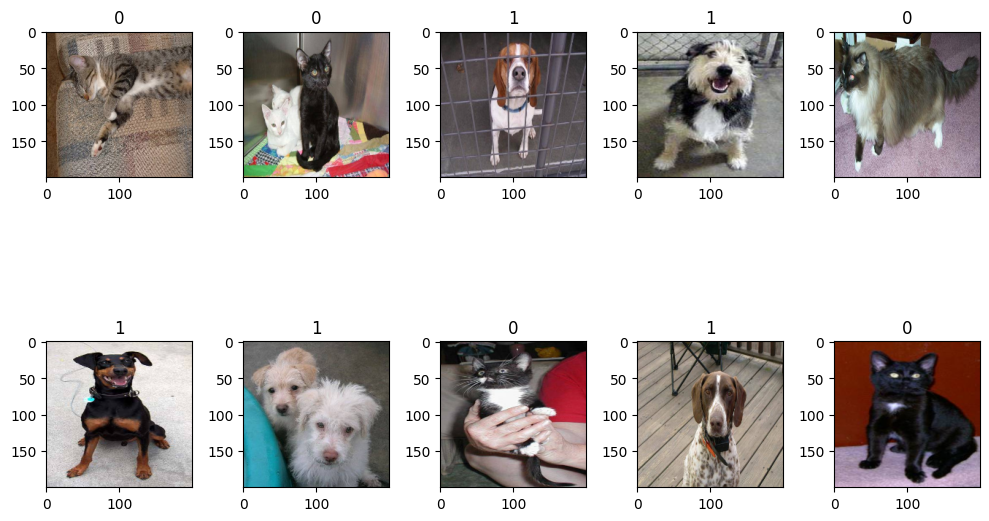

In [33]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_small[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_small[i])
    
fig.tight_layout()  